# Notebook 3: Bivariate Analysis

In this notebook, all categorical and numerical variables will be analized against the target variable (Alzheimer's diagnosis = categorical variable)


#### Table of contents:
* [Categorical variables vs DX](#categorical-variables)

## Imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_data.csv')

## Categorical variables

Comparison of target variable with the rest of categorical variables.
  
In order to have a better visual comparison, I'll use the relative frequencies in all cases.

### Categorical main_data

[Back to top](#table-of-contents)

In [4]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_main = column_selection.index.to_list()

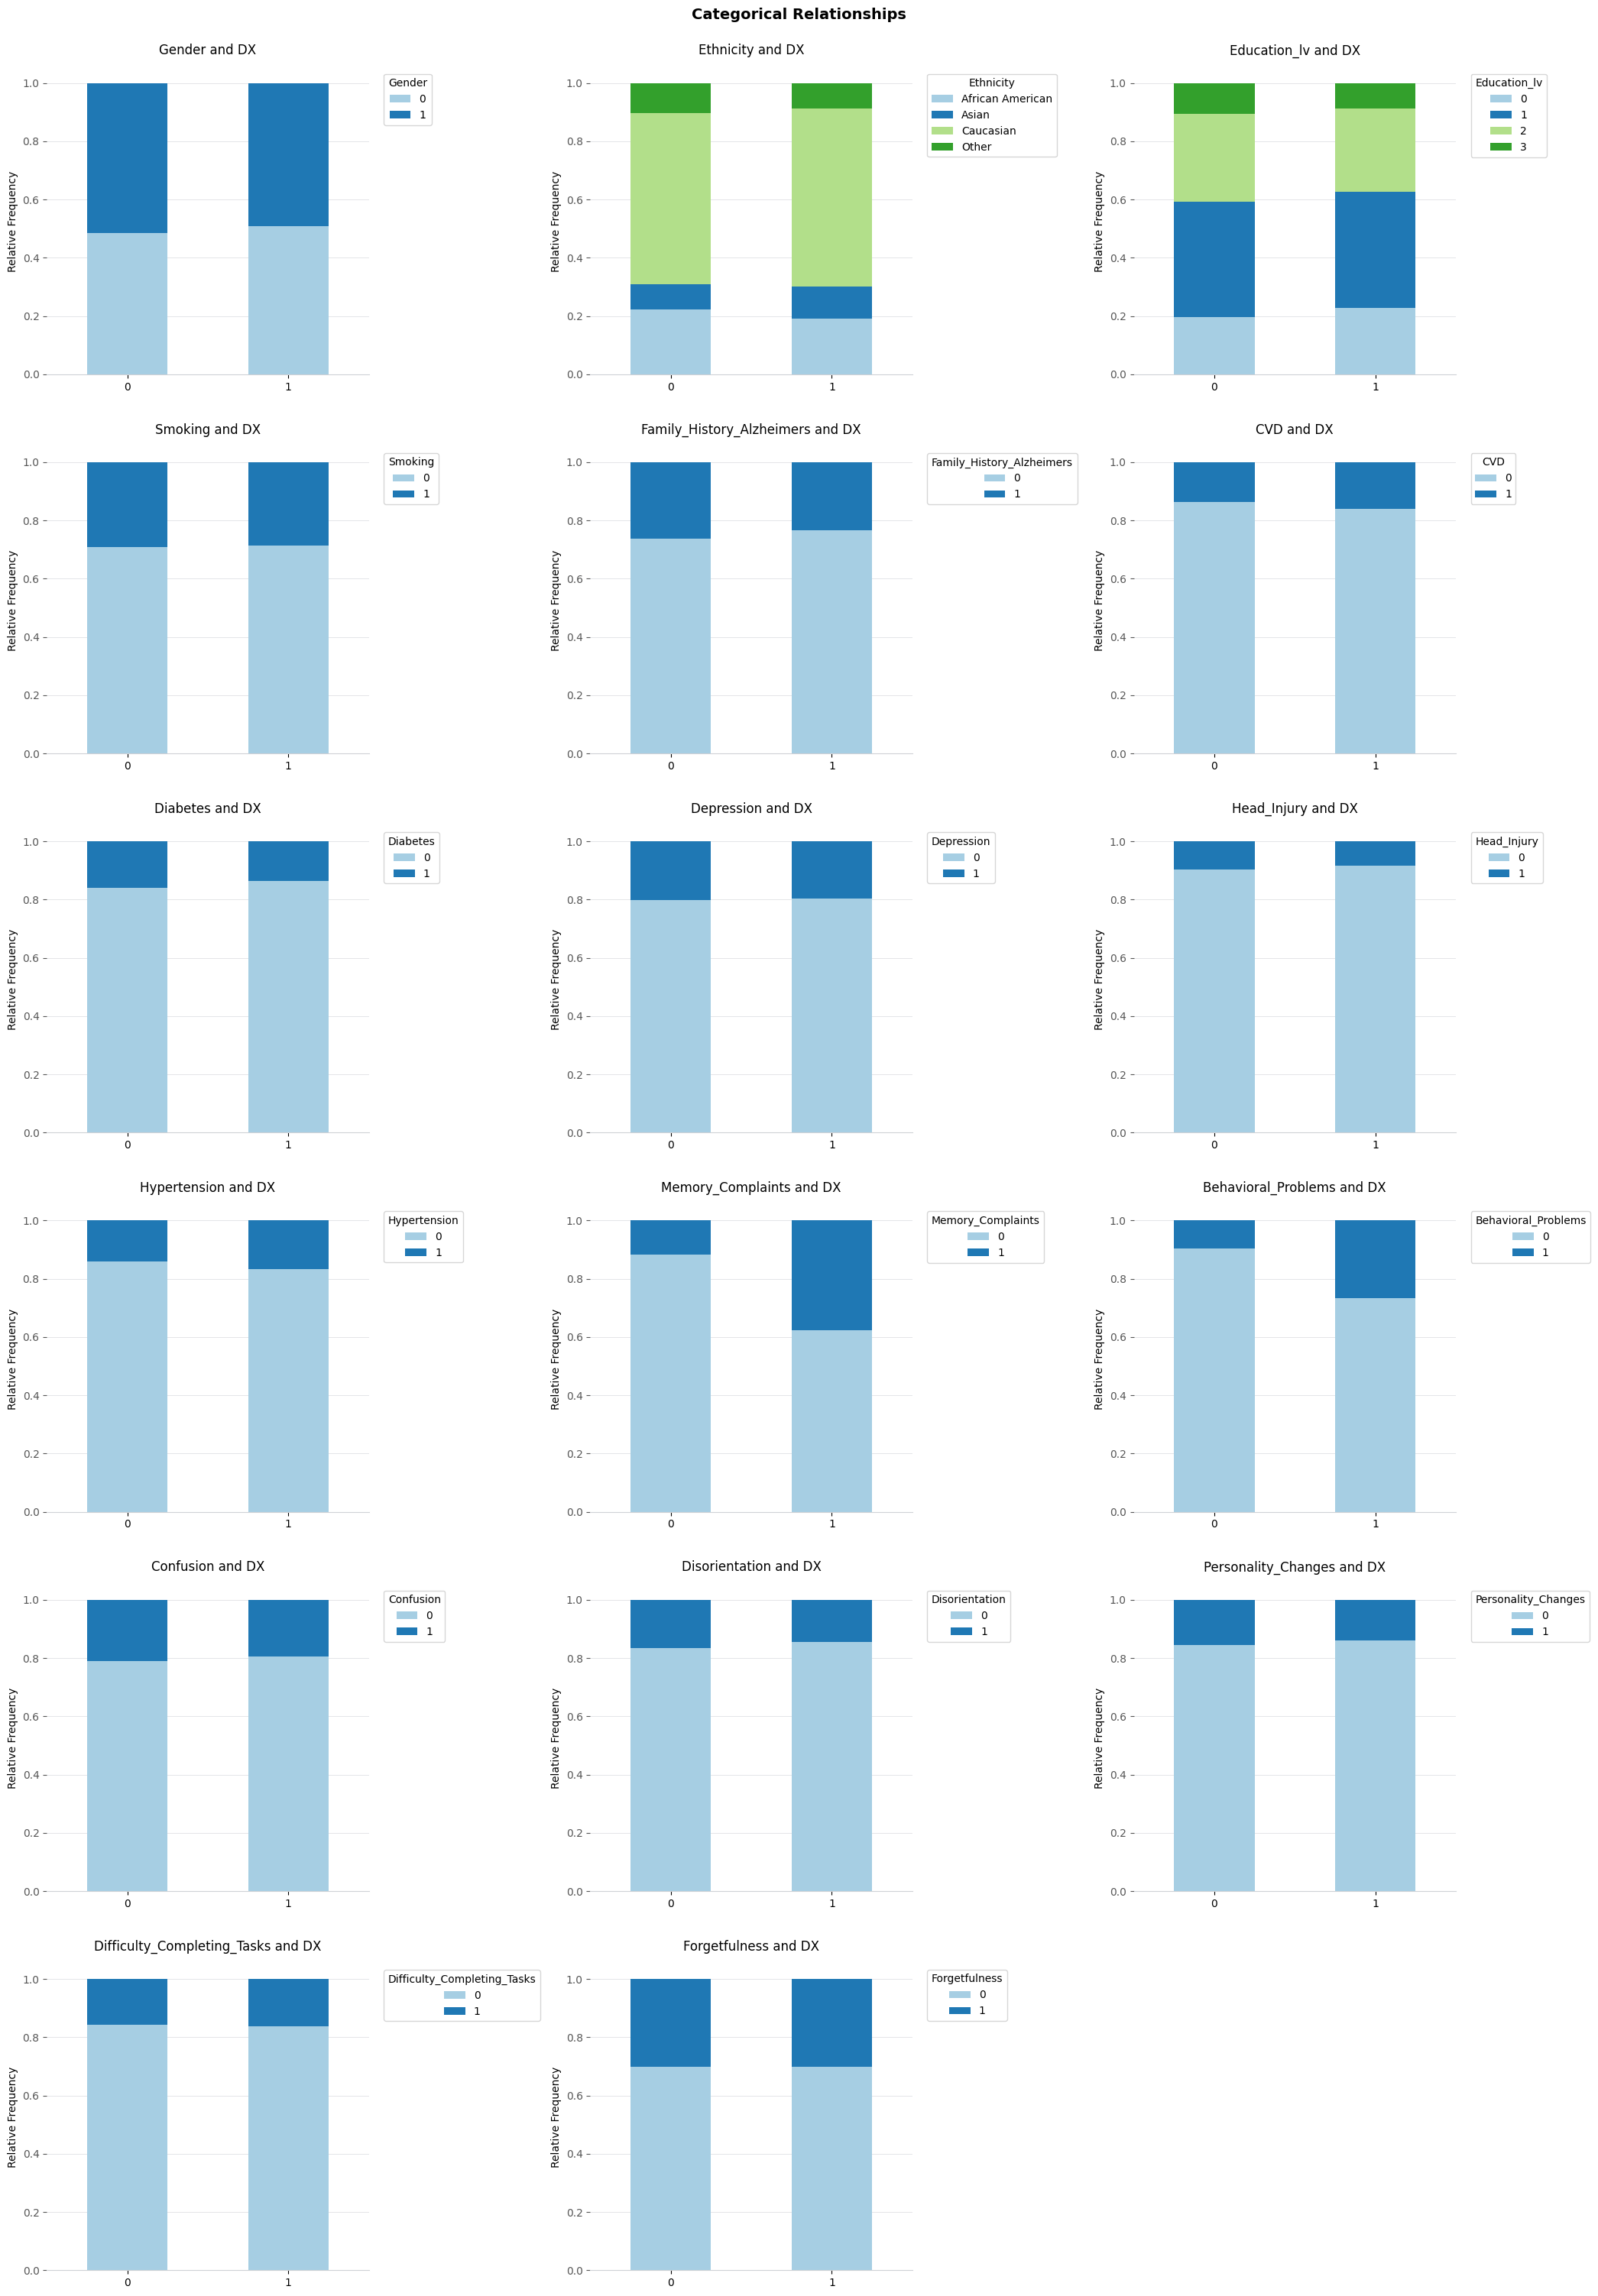

In [5]:
vt.plot_categorical_relationship_stacked(df_main, 'DX', categorical_main, relative = True, palette = 'Paired');

It seems as if Memory_Complaints and Behavioral_Problems are the only variables with some correlation with AD diagnosis.  

Let's confirm this with numbers

In [16]:
dt.categorical_correlation(df_main, 'DX', categorical_main)[0]

{'Memory_Complaints': np.float64(1.526605098526405e-45),
 'Behavioral_Problems': np.float64(4.731446795211872e-25)}

For both variables, p-value seems to be way below 0.05. I'll save this variables for further analysis.

### Categorical biomarker_data

[Back to top](#table-of-contents)

In [ ]:
df_grouped = df_bm.groupby

In [6]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_bm = column_selection.index.to_list()

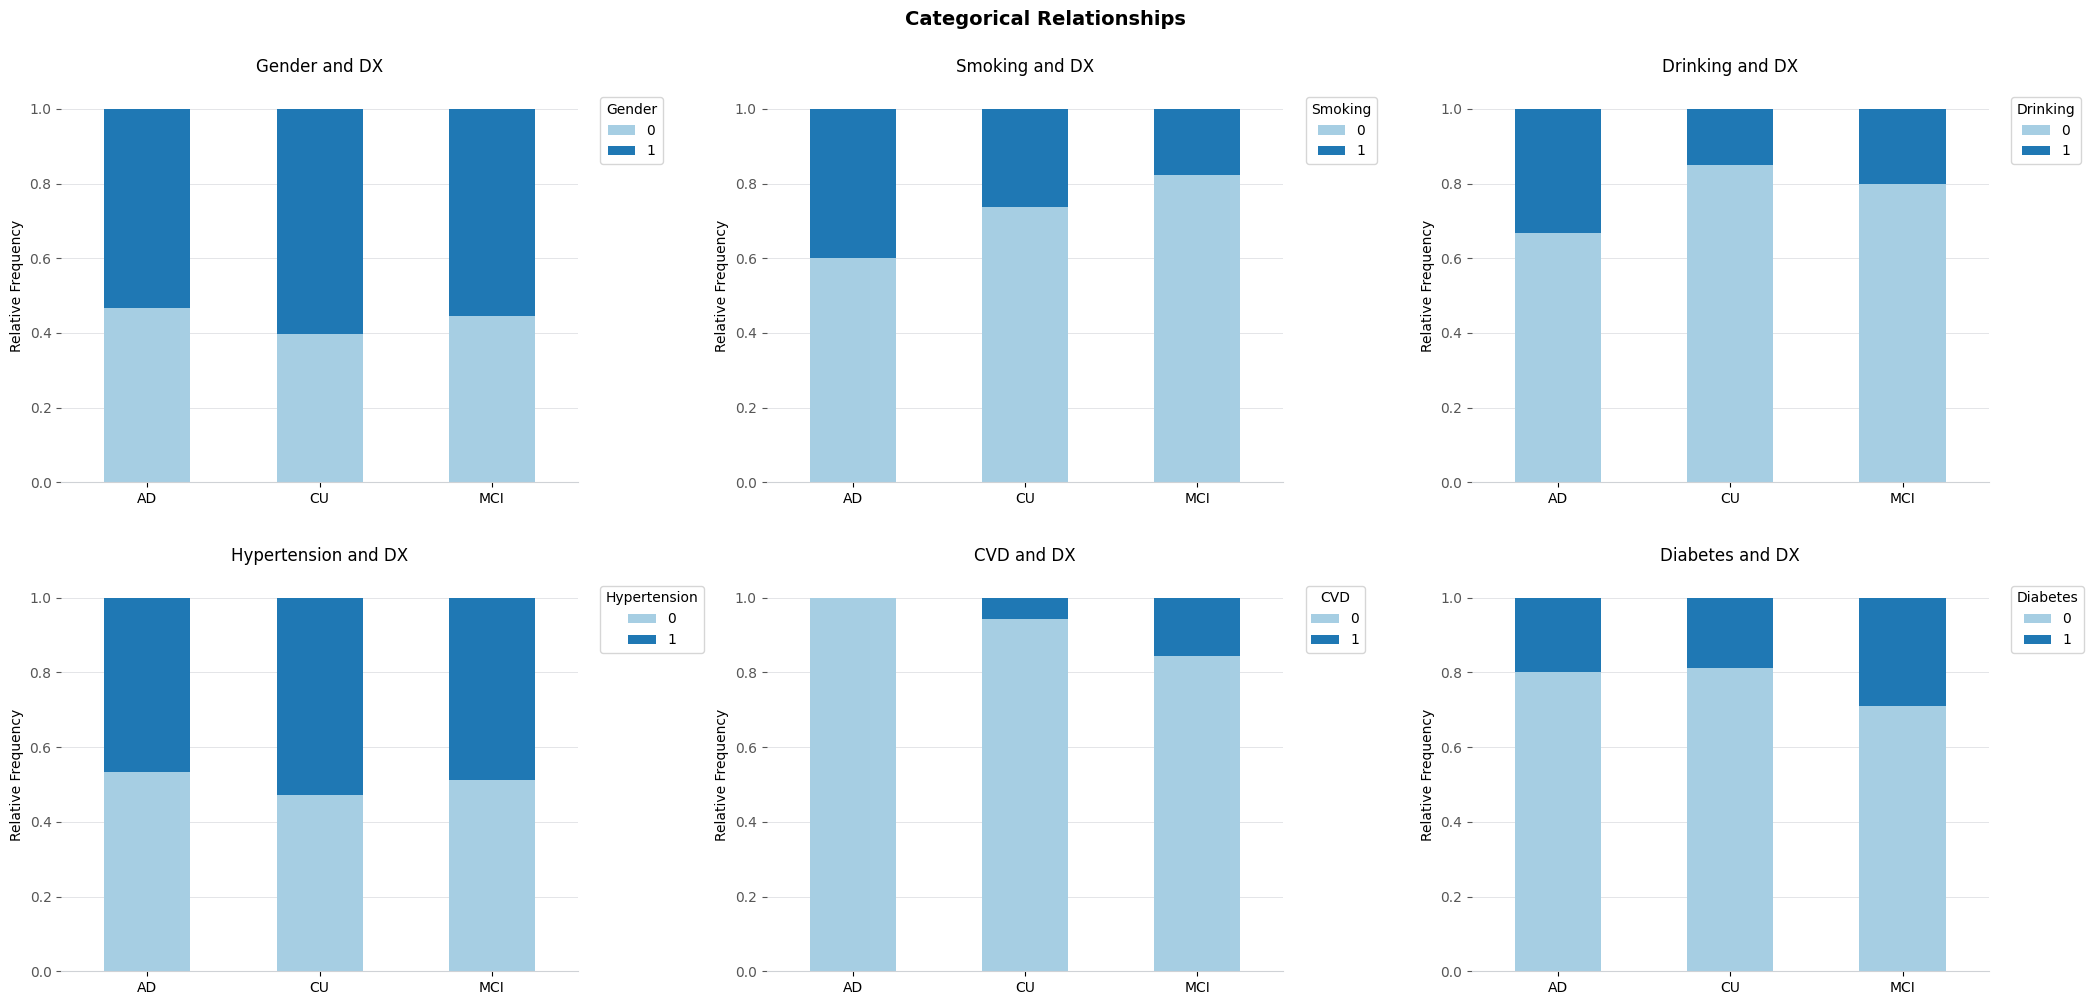

In [7]:
vt.plot_categorical_relationship_stacked(df_bm, 'DX', categorical_bm, relative = True, palette = 'Paired');

In [26]:
bm = dt.categorical_correlation(df_bm, 'DX', categorical_bm)

for variable in bm[1]:
    print(f'P-value of {variable}: {bm[1][variable]['p']}')

P-value of Gender: 0.8370382119306571
P-value of Smoking: 0.20971432003792884
P-value of Drinking: 0.28736212258639765
P-value of Hypertension: 0.8825541693908439
P-value of CVD: 0.09860124920531134
P-value of Diabetes: 0.4799930853532808
P-value of DX: 9.585800722276226e-48


It seems there is no correlation in between AD diagnosis and this variables, which reinforces the findings in main_data shown before

### Categorical adni_data

[Back to top](#table-of-contents)

In [8]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_adni = column_selection.index.to_list()

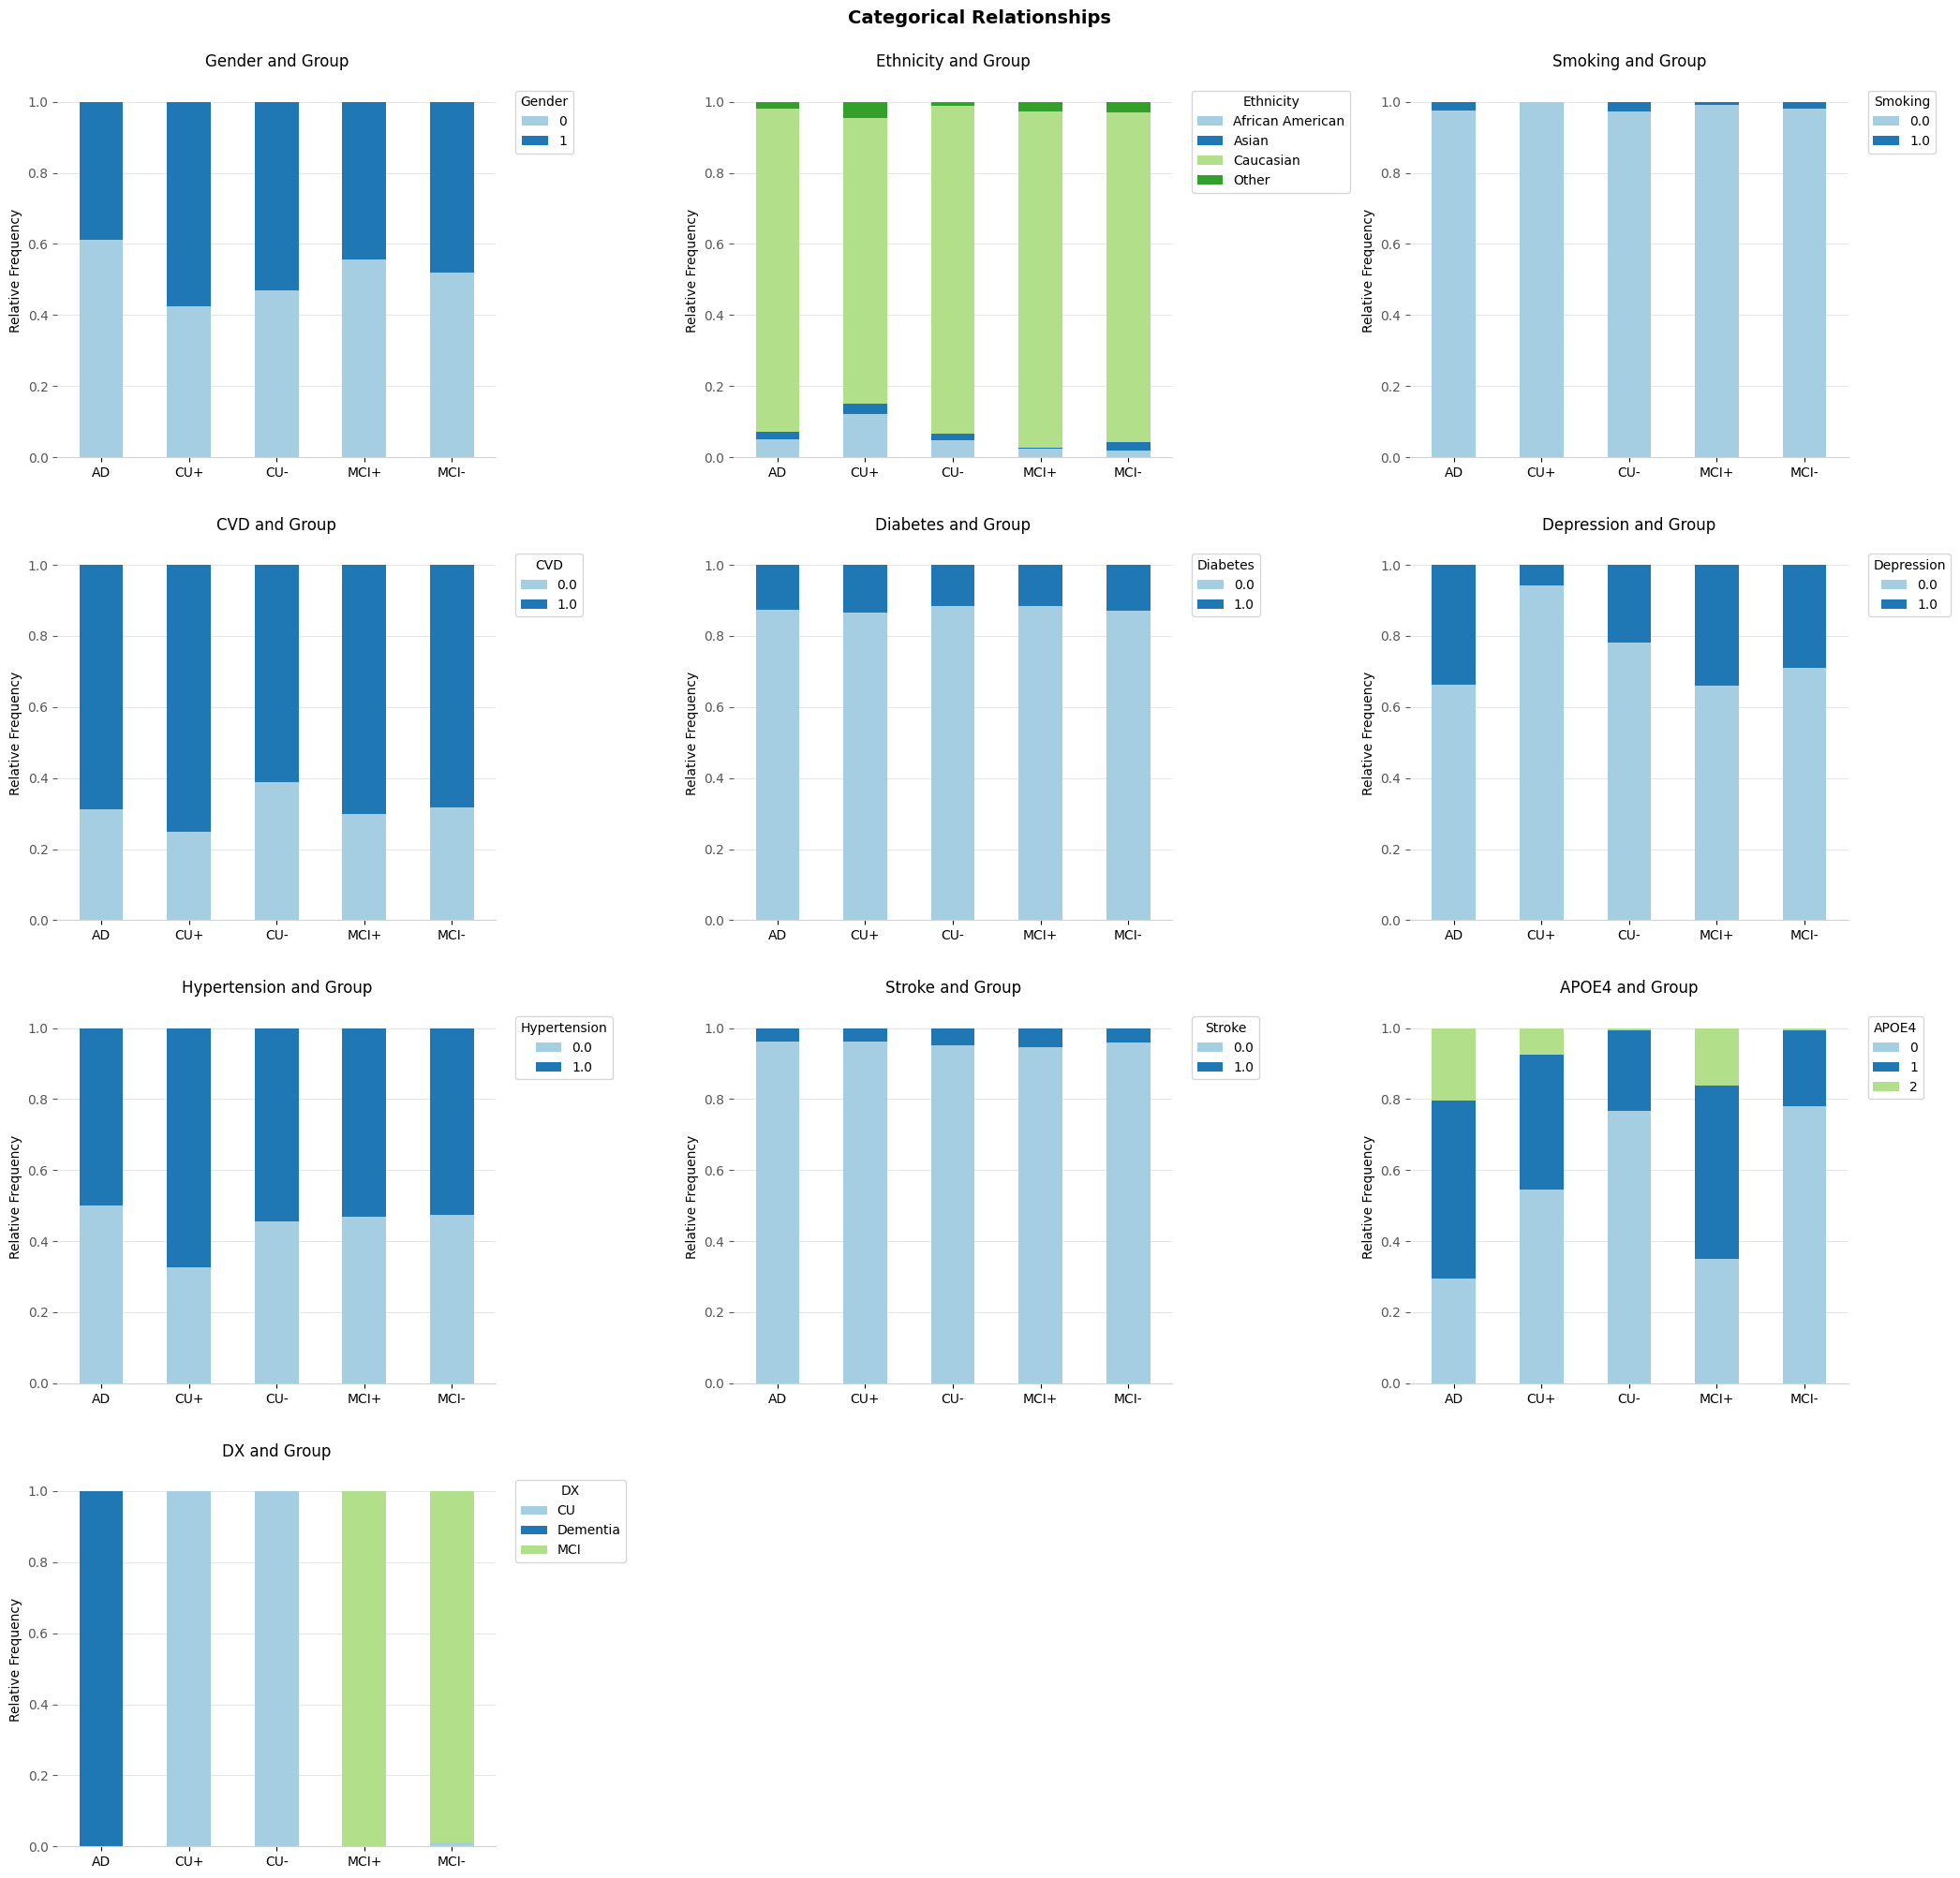

In [32]:
vt.plot_categorical_relationship_stacked(df_adni, 'Group', categorical_adni, relative = True, palette = 'Paired');

In [33]:
adni = dt.categorical_correlation(df_adni, 'Group', categorical_adni)
adni[0]

{'Ethnicity': np.float64(0.025856191338948894),
 'Depression': np.float64(0.0003332701017431939),
 'APOE4': np.float64(2.3164505433914178e-29),
 'DX': np.float64(0.0)}

In [31]:
for variable in adni[1]:
    print(f'P-value of {variable}: {adni[1][variable]['p']}')

P-value of Gender: 0.013802755050787917
P-value of Ethnicity: 0.1358621879443357
P-value of Smoking: 0.7270631022396343
P-value of CVD: 0.6042309684343903
P-value of Diabetes: 0.9915937735644639
P-value of Depression: 0.0003992808208615613
P-value of Hypertension: 0.4913853229418039
P-value of Stroke: 0.9073915387569274
P-value of APOE4: 4.2134489455317233e-13
P-value of DX: 0.0
P-value of Group: 0.0


It seems there is correlation in between AD diagnosis and this variables, which reinforces the findings in main_data shown before